In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
is6_lidar= np.genfromtxt('/Users/arcturus/Documents/PhD/is6_f11/python_zi/is6_f11_pass1_aa522816_523019_c_zi.xyz',
                         skip_header=1)

In [3]:
ship_inds = np.where((is6_lidar[:,1] >= -110.3) &
              (is6_lidar[:,1] <= 2.3) &
              (is6_lidar[:,2] >= -80.95) &
              (is6_lidar[:,2] <= -29.26))

l1 = np.zeros_like(is6_lidar[:,0])
l1[ship_inds] = 1
is6_lidar = is6_lidar[np.where(l1 <1),:]

is6_lidar = np.squeeze(is6_lidar)
is6_lidar = is6_lidar[1:,:]

In [4]:
subset = is6_lidar[(is6_lidar[:,1] >= -150) & (is6_lidar[:,1] <= 130) & (is6_lidar[:,2] >= -30) & (is6_lidar[:,2] <= 270) ]

In [5]:
fake_y = np.arange(0,100,1)
fake_x = np.zeros_like(fake_y)

In [6]:
is6_kp= np.genfromtxt('/Users/arcturus/Documents/PhD/is6_f11/python_zi/is6_f11_pass1_aa522816_523019_ckeypoints.xyz')

/Users/arcturus/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


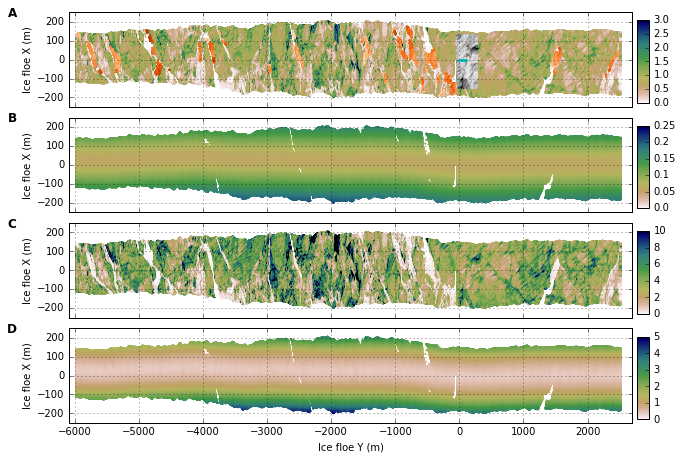

In [7]:
cmap = plt.get_cmap('gist_earth_r')
cmap2 = plt.get_cmap('Oranges_r', 16)
cmap3 = plt.get_cmap('Greys', 16)
#cmap4 = plt.get_cmap('cubehelix', 16)
cmap4 = plt.get_cmap('gist_earth_r')




fig = plt.figure(figsize=(22/2.51, 16/2.51))

ax0 = fig.add_subplot(4,1,1)

a0 = ax0.scatter(is6_lidar[:,2], is6_lidar[:,1], c=is6_lidar[:,3], cmap=cmap4, lw=0, s = 3,
           vmin=0, vmax=3)
#plt.colorbar()

ax0.scatter(is6_kp[:,1], is6_kp[:,0], c=is6_kp[:,2], cmap=cmap2, lw=0, s = 2,
           vmin=-0.15, vmax=0.15)

ax0.scatter(subset[:,2], subset[:,1], c=subset[:,3], cmap=cmap3, lw=0, s = 3,
           vmin=-0.1, vmax=2)

ax0.scatter(fake_y, fake_x, c='c', lw=0, s = 3)
ax0.set_xlim([-6100, 2700])
ax0.set_ylim([-250, 250])
ax0.set_ylabel('Ice floe X (m)')
ax0.grid()
ax0.text(-0.1, 0.99,'A', ha='center', va='center', transform=ax0.transAxes, fontsize=12, weight='bold')
ax0.set_xticklabels([])
cbaxes0= fig.add_axes([0.99, 0.78, 0.02, 0.18])
cb0 = plt.colorbar(a0, cax=cbaxes0, cmap=cmap4)
cb0.set_ticks(np.arange(0,3.5,0.5))
cb0.set_ticklabels(np.arange(0,3.5,0.5))

ax1 = fig.add_subplot(4,1,2)

a1 = ax1.scatter(is6_lidar[:,2], is6_lidar[:,1], c=is6_lidar[:,4], cmap=cmap, lw=0, s = 3,
           vmin=0, vmax=0.25)
ax1.set_xlim([-6100, 2700])
ax1.set_ylim([-250, 250])
ax1.set_ylabel('Ice floe X (m)')
ax1.grid()
ax1.text(-0.1, 0.99,'B', ha='center', va='center', transform=ax1.transAxes, fontsize=12, weight='bold')
ax1.set_xticklabels([])
cbaxes1= fig.add_axes([0.99, 0.55, 0.02, 0.18])
cb1 = plt.colorbar(a1, cax=cbaxes1, cmap=cmap)
cb1.set_ticks(np.arange(0,0.26,0.05))
cb1.set_ticklabels(np.arange(0,0.26,0.05))

ax2 = fig.add_subplot(4,1,3)

a2 = ax2.scatter(is6_lidar[:,2], is6_lidar[:,1], c=is6_lidar[:,5], cmap=cmap4, lw=0, s = 3,
           vmin=0, vmax=10)
ax2.set_xlim([-6100, 2700])
ax2.set_ylim([-250, 250])
ax2.set_ylabel('Ice floe X (m)')
ax2.grid()
ax2.text(-0.1, 0.99,'C', ha='center', va='center', transform=ax2.transAxes, fontsize=12, weight='bold')
ax2.set_xticklabels([])
cbaxes2= fig.add_axes([0.99, 0.32, 0.02, 0.18])
cb2 = plt.colorbar(a2, cax=cbaxes2, cmap=cmap4)
cb2.set_ticks(np.arange(0,12,2))
cb2.set_ticklabels(np.arange(0,12,2))

ax3 = fig.add_subplot(4,1,4)

a3 = ax3.scatter(is6_lidar[:,2], is6_lidar[:,1], c=is6_lidar[:,6], cmap=cmap, lw=0, s = 3,
           vmin=0, vmax=5)
ax3.set_xlim([-6100, 2700])
ax3.set_ylim([-250, 250])
ax3.set_xlabel('Ice floe Y (m)')
ax3.set_ylabel('Ice floe X (m)')
ax3.grid()
ax3.text(-0.1, 0.99,'D', ha='center', va='center', transform=ax3.transAxes, fontsize=12, weight='bold')
cbaxes3= fig.add_axes([0.99, 0.09, 0.02, 0.18])
cb3 = plt.colorbar(a3, cax=cbaxes3, cmap=cmap)
cb3.set_ticks(np.arange(0,6,1))
cb3.set_ticklabels(np.arange(0,6,1))

plt.tight_layout()

plt.savefig('is6_lidar_map.png', bbox_inches='tight', dpi=300)

In [8]:
print('total freeboard from this LiDAR segment: {0}, std: {1}'.format(np.mean(is6_lidar[:,3]), np.std(is6_lidar[:,3])))
print('total freeboard range this LiDAR segment: {0}, max: {1}'.format(np.min(is6_lidar[:,3]), np.max(is6_lidar[:,3])))
print('uncertainty surrounding total freeboard from this LiDAR segment: {0} to {1}'.format(np.min(is6_lidar[:,4]), np.max(is6_lidar[:,4])))

total freeboard from this LiDAR segment: 0.7532724344271681, std: 0.47572010744698645
total freeboard range this LiDAR segment: 0.0, max: 5.17578
uncertainty surrounding total freeboard from this LiDAR segment: 0.058 to 0.21


In [9]:
print('ice thickness from this LiDAR segment: {0}, std: {1}'.format(np.mean(is6_lidar[:,5]), np.std(is6_lidar[:,5])))
print('ice thickness range this LiDAR segment: {0}, max: {1}'.format(np.min(is6_lidar[:,5]), np.max(is6_lidar[:,5])))
print('uncertainty surrounding ice thickness from this LiDAR segment: {0} to {1}'.format(np.min(is6_lidar[:,6]), np.max(is6_lidar[:,6])))

ice thickness from this LiDAR segment: 3.7330431986135206, std: 2.3530826734623074
ice thickness range this LiDAR segment: 0.0, max: 25.60571
uncertainty surrounding ice thickness from this LiDAR segment: 0.37181 to 4.9153


In [10]:
print('snow depth from this LiDAR segment: {0}, std: {1}'.format(np.mean(is6_lidar[:,11]), np.std(is6_lidar[:,11])))
print('snow depth range this LiDAR segment: {0}, max: {1}'.format(np.min(is6_lidar[:,11]), np.max(is6_lidar[:,11])))
print('uncertainty surrounding snow depth from this LiDAR segment: {0} to {1}'.format(np.min(is6_lidar[:,12]), np.max(is6_lidar[:,12])))

snow depth from this LiDAR segment: 0.5268739461728853, std: 0.3334323889617329
snow depth range this LiDAR segment: 0.0, max: 3.62702
uncertainty surrounding snow depth from this LiDAR segment: 0.04066 to 0.14721
